In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
titanic=pd.read_csv(r"C:\Users\atanu\OneDrive\Desktop\data science assignment\Logistic Regression\Titanic_train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic['Age'].isnull().sum(),titanic['Cabin'].isnull().sum(),titanic['Embarked'].isnull().sum()


(177, 687, 2)

In [7]:
titanic['Age']=titanic['Age'].fillna(0)
titanic['Cabin']=titanic['Cabin'].fillna(titanic['Cabin'].mode().iloc[0])
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode().iloc[0])
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])

In [8]:
titanic['Age'].isnull().sum(),titanic['Cabin'].isnull().sum(),titanic['Embarked'].isnull().sum()

(0, 0, 0)

In [9]:
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.361353,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.024978,-0.114631,-0.245489,-0.182333
Age,0.038125,0.010539,-0.361353,0.024978,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.135516,0.159651,0.216225,1.000000


C:\Users\atanu\.ipython\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


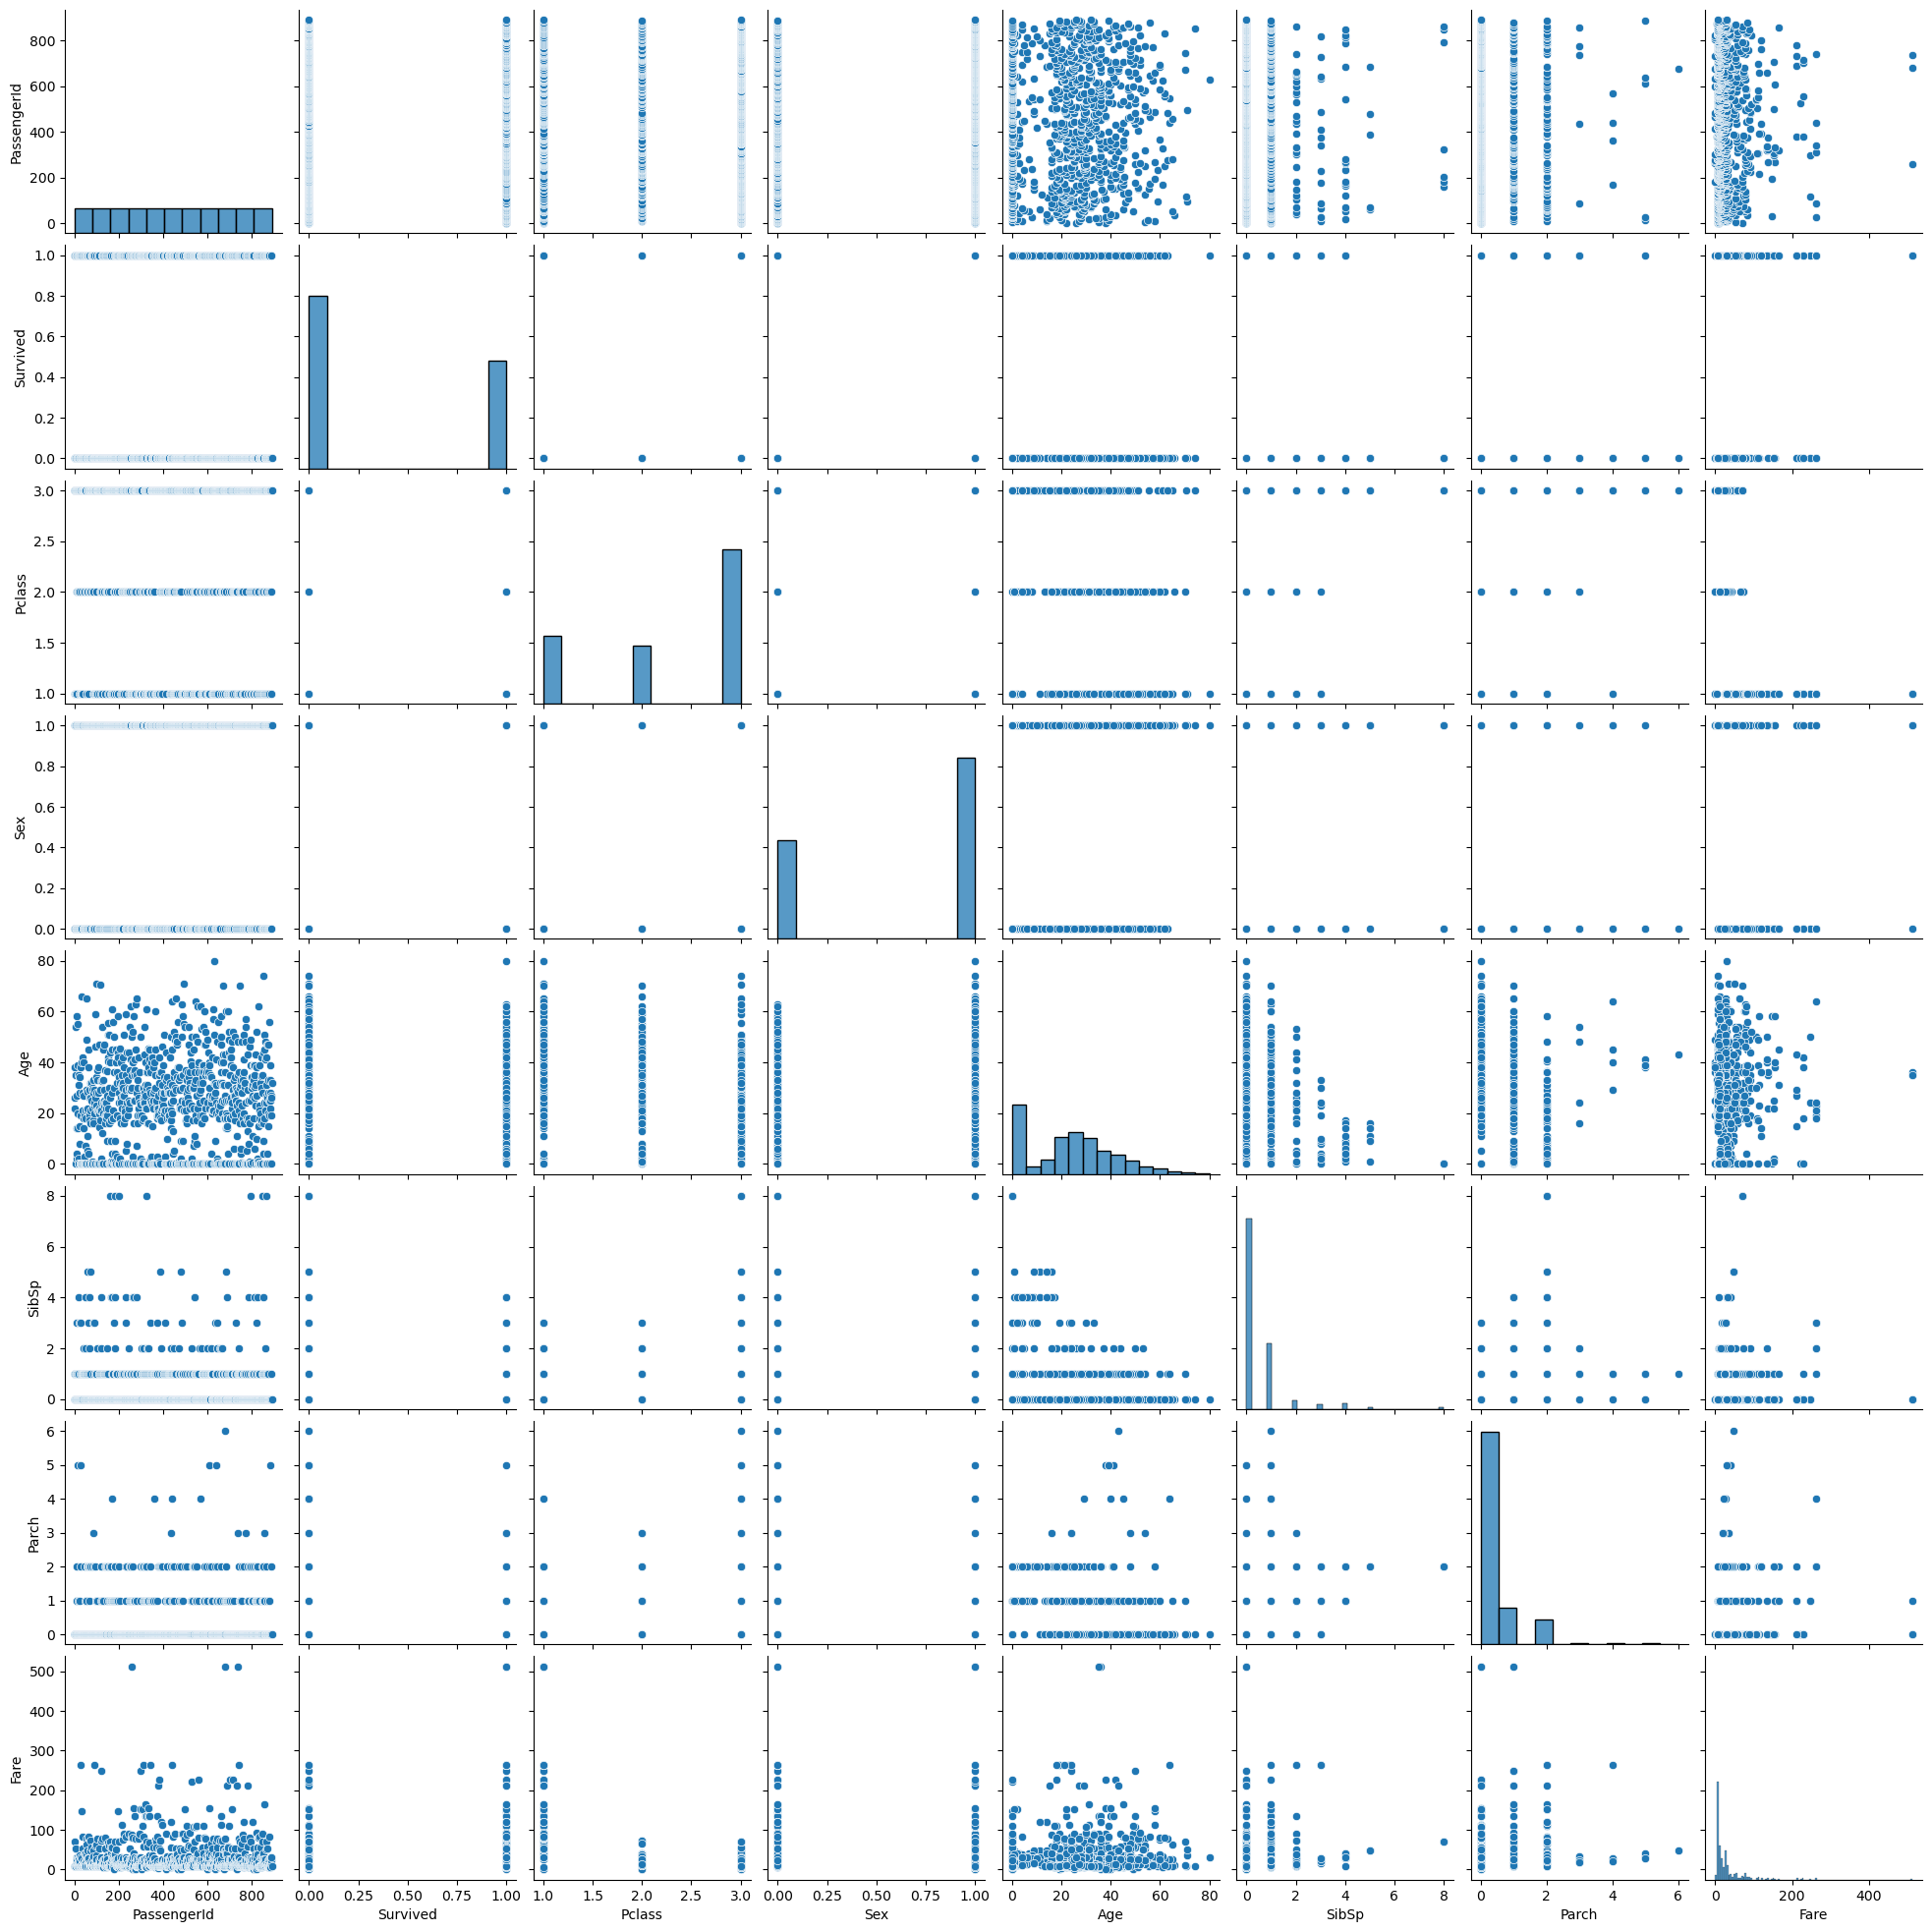

In [10]:
import seaborn as sns
sns.pairplot(titanic)

<Axes: xlabel='Survived'>

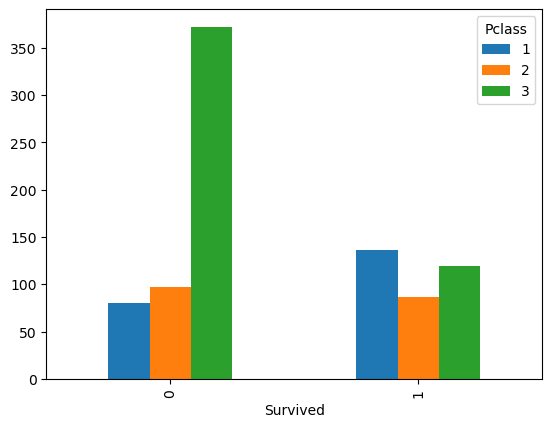

In [11]:
pd.crosstab(titanic.Survived,titanic.Pclass).plot(kind='bar')

<Axes: xlabel='Survived'>

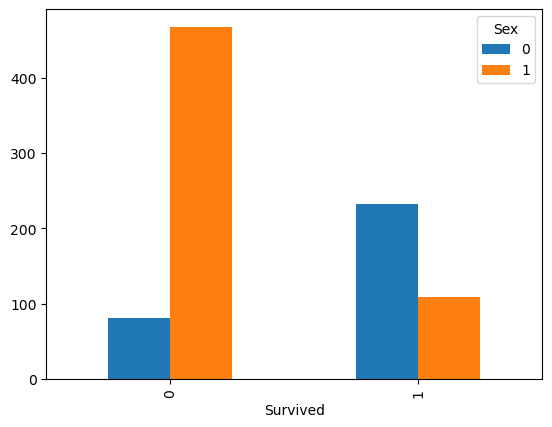

In [12]:
pd.crosstab(titanic.Survived,titanic.Sex).plot(kind='bar')

In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived'>

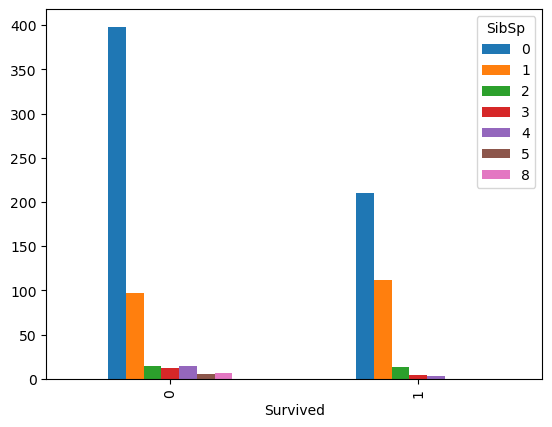

In [14]:
pd.crosstab(titanic.Survived,titanic.SibSp).plot(kind='bar')

<Axes: xlabel='Survived'>

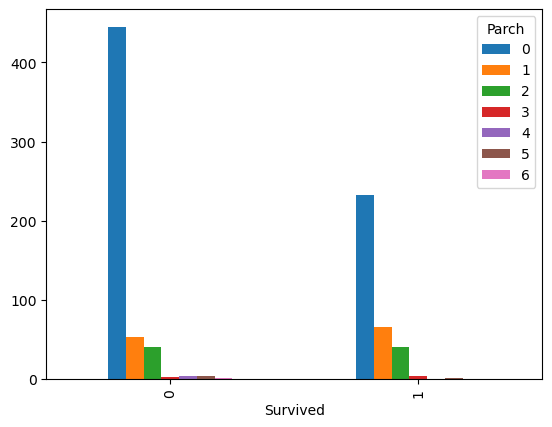

In [15]:
pd.crosstab(titanic.Survived,titanic.Parch).plot(kind='bar')

<Axes: xlabel='Survived'>

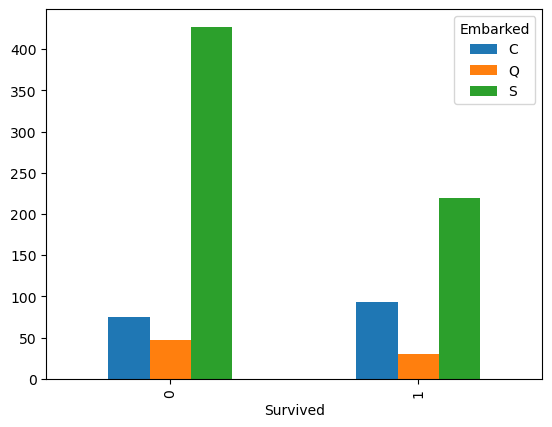

In [16]:
pd.crosstab(titanic.Survived,titanic.Embarked).plot(kind='bar')

In [17]:
x=titanic.iloc[:,[2,4,5,6]]
y=titanic.iloc[:,1]

In [18]:
x

,Pclass,Sex,Age,SibSp
0,3,1,22.0,1
1,1,0,38.0,1
2,3,0,26.0,0
3,1,0,35.0,1
4,3,1,35.0,0
...,...,...,...,...
886,2,1,27.0,0
887,1,0,19.0,0
888,3,0,0.0,1
889,1,1,26.0,0


In [19]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
x_train.shape,y_train.shape

((668, 4), (668,))

In [21]:
log_reg=LogisticRegression()
model=log_reg.fit(x,y)

In [22]:
y_pred=model.predict(x)

In [23]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [24]:
print(confusion_matrix(y_pred,y))

[[468 107]
 [ 81 235]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.69      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



In [26]:
# 79% accuracy

In [27]:
test_data=pd.read_csv(r"C:\Users\atanu\OneDrive\Desktop\data science assignment\Logistic Regression\Titanic_test.csv")

In [28]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
test_data['Sex']=LabelEncoder().fit_transform(test_data['Sex'])
test_data['Age']=test_data['Age'].fillna(0)


In [30]:
x_test=test_data.iloc[:,[1,3,4,5]]
x_test

,Pclass,Sex,Age,SibSp
0,3,1,34.5,0
1,3,0,47.0,1
2,2,1,62.0,0
3,3,1,27.0,0
4,3,0,22.0,1
...,...,...,...,...
413,3,1,0.0,0
414,1,0,39.0,0
415,3,1,38.5,0
416,3,1,0.0,0


In [31]:
y_pred=log_reg.predict(x_test)

In [32]:
survival=y_pred

In [33]:
test_data['Survival']=pd.DataFrame(y_pred,columns=['Survival'])

In [34]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",1,0.0,0,0,359309,8.0500,NaN,S,0


In [35]:
import streamlit as st
# Streamlit UI
st.title("Titanic Survival Prediction")

st.sidebar.header("Input Passenger Details")
pclass = st.sidebar.selectbox("Pclass", [1, 2, 3])
sex = st.sidebar.radio("Sex", ["male", "female"])
age = st.sidebar.slider("Age", 0, 100, 25)
sibsp= st.sidebar.slider("SibSp", 0, 10, 1)

# Encode sex input
sex_encoded = 1 if sex == 'female' else 0

# Predict
input_data = pd.DataFrame([[pclass, sex_encoded, age, sibsp]], columns=['Pclass', 'Sex', 'Age', 'SibSp'])
prediction = model.predict(input_data)[0]

# Display result
if prediction == 1:
    st.success("The passenger is predicted to have survived.")
else:
    st.error("The passenger is predicted not to have survived.")


2025-04-08 13:44:44.454 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 13:44:46.666 
  command:

    streamlit run C:\Users\atanu\.ipython\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-08 13:44:46.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 13:44:46.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 13:44:46.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 13:44:46.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 13:44:46.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 13:44:46.694 Thread 'MainThread': mis

# Difference between precision and recall



# CROSS VALIDATION REQUIRD FOR LOGISTIC REGRESSION

In [1]:
# for deplyoment another code done